<a href="https://colab.research.google.com/github/thiennguyen37-qn/diabetes-prediction/blob/main/diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DIABETES BINARY CLASSIFICATION PROBLEM

The goal is to predict whether a patient has diabetes or not based on their medical and demographic data.

First of all, we need to install some essential packages for solving the problem.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/thiennguyen37-qn/diabetes-prediction/refs/heads/main/Datasets/diabetes_dataset.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


The dataset contains exactly 100.000 instances. Besides that, 9 columns are included with the last one (diabetes) plays as the target column.

In the next step, we have a general look at the table with the help of some popular methods such as: describe(), info() and value_counts() to indicate the distribution of the target.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


The info illustrates that there are no nulls across all columns. This is a good new because we are not spending too much time in dealing with missing values problem.

In term of data types, we have got 7 numeric columns (3 floats and 4 ints) and 2 object columns. In the next steps, we will dive into further analysis on these columns.

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69
HbA1c_level,100000.0,5.527507,1.070672,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,100000.0,138.058060,40.708136,80.00,100.00,140.00,159.00,300.00
diabetes,100000.0,0.085000,0.278883,0.00,0.00,0.00,0.00,1.00


In [5]:
df.describe(include=object).T

,count,unique,top,freq
gender,100000,3,Female,58552
smoking_history,100000,6,No Info,35816


The tables from 'describe' method brings us some highlights below:
- The average age is approximately 41.9 and its standard deviation is 22.5 which means age is widely distributed. Its range is from 0.08 to 80 and the fact that Age is a float-type column, we need to convert it into the integer-type one.

- Hypertension, heart_disease, and diabetes are binary columns. Each of them takes only two possible values, 0 and 1, indicating whether a person suffers from the condition. Another noticeable point: the average values of these columns are less than 0.1, we can conclude that just a minority of people recorded in dataset are suffered.

- Considering diabetes is our target column, safe to say we are currently in an imbalanced dataset.

- BMI (Body Mass Index) has mean value around 27.32 but it is likely affected by some massive numbers, because we can see the max value is about 95.6 which is impossible in term of BMI. This column probably includes a bunch of outliers so applying data visualization to detect is a must in the next stage.

- There might be some potential outliers in blood_glucose_level columns as the max value is abnormally large compared to Q1, Q2, Q3.

Next, we are heading to some visualization for our data

In [6]:
def count(df,col):
  sns.countplot(data = df, x = col)
  plt.show()

def hist(df,col,n_bins):
  sns.histplot(data = df, x = col, bins = n_bins, kde = True)

def box(df,col):
  sns.boxplot(data = df, x = col)

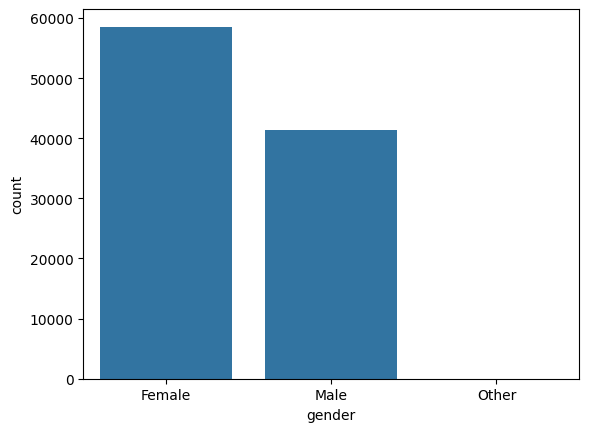

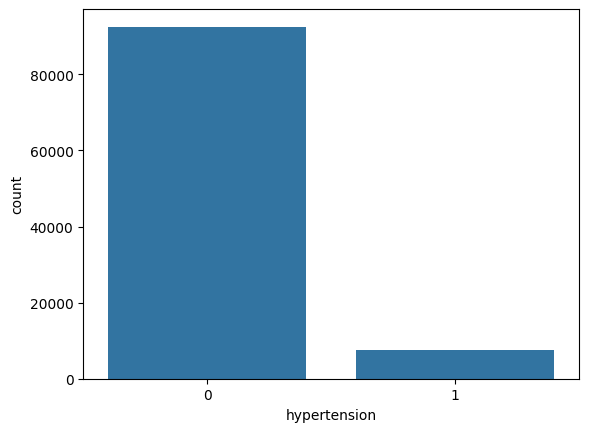

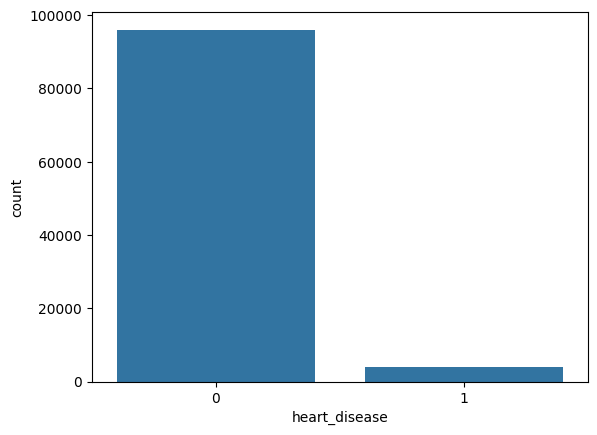

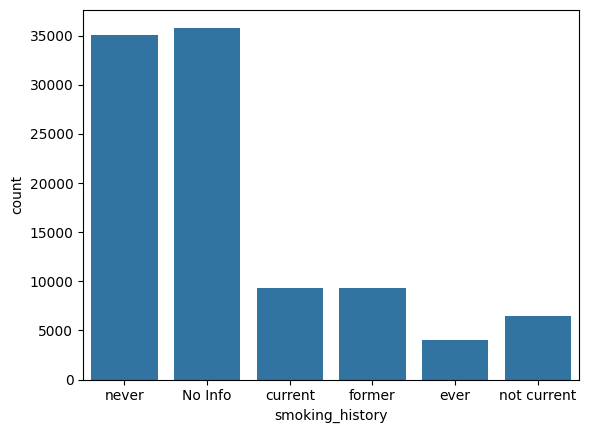

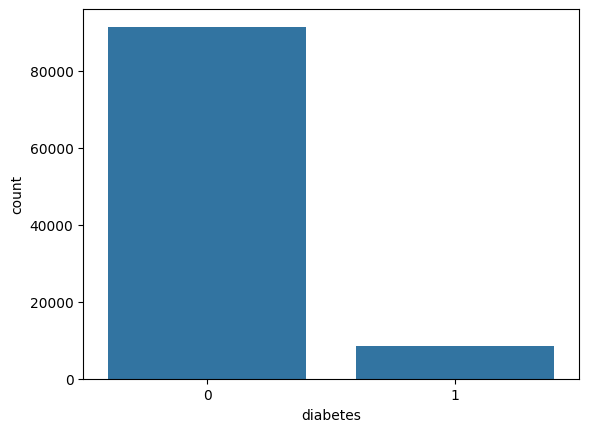

In [7]:
count(df,'gender')
count(df,'hypertension')
count(df,'heart_disease')
count(df,'smoking_history')
count(df,'diabetes')

From countplots, we can see some specific points:
- There are 3 gender values appeared: Male, Female and Other. However, the 'Other' value accounts for a very small population so we can totally drop it.
- As mentioned before, hypertension, heart_disease and diabetes have an imbalanced distribution as the majority of records indicate that individuals did not suffer from these conditions.
- In terms of smoking_history, there are six different values, as 'never' and 'No info' are significantly higher than the others. We probably need to merge some similar values into a general group to reduce complexity.

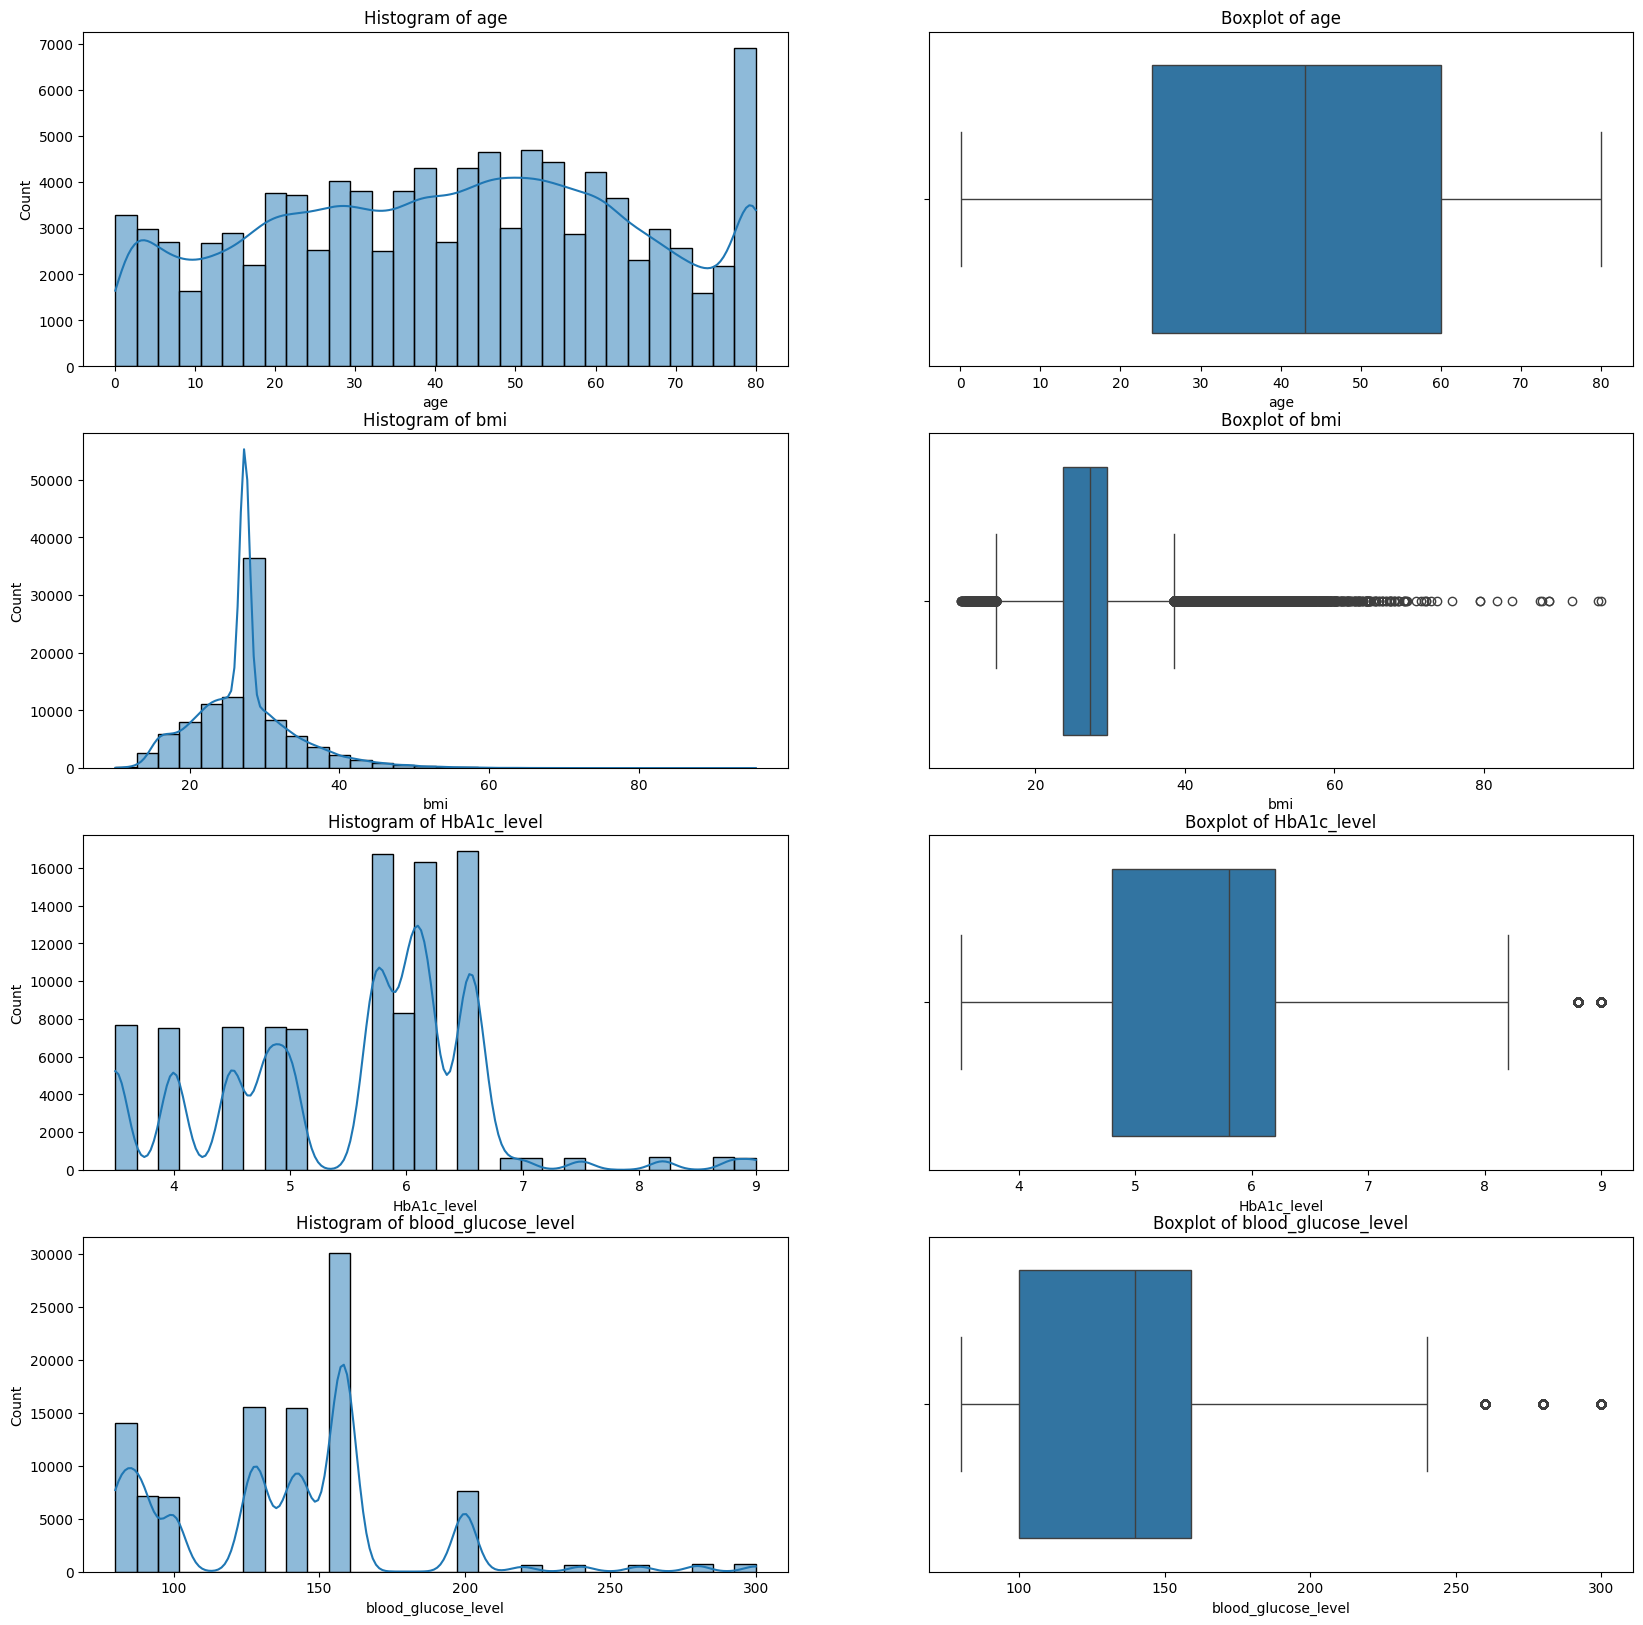

In [8]:
plt.figure(figsize = (20,20))
for feature in list(enumerate(['age','bmi','HbA1c_level','blood_glucose_level'])):
  plt.subplot(4,2, 2 * feature[0] + 1)
  plt.title('Histogram of ' + feature[1])
  hist(df,feature[1],30)
  plt.subplot(4,2, 2 * feature[0] + 2)
  plt.title('Boxplot of ' + feature[1])
  box(df,feature[1])

plt.show()

From the histogram and box plot of some numeric features, some observations have been made as follows:
- Age: widely distributed from 0 to 80, no outliers. The data is relatively clean
- BMI: right-skewed distribution, highly centralized from 20 to 40. Many outliers are visibly detected from the box plot on both sides
- HbA1c_level: multimodal distribution, the distribution has a long right tail reaching approximately 9. Some outliers are also on the upper ends of box plot
- blood_glucose_level: multimodal distribution, the distribution has a long right tail reaching approximately 300. Some outliers are also on the upper ends of box plot

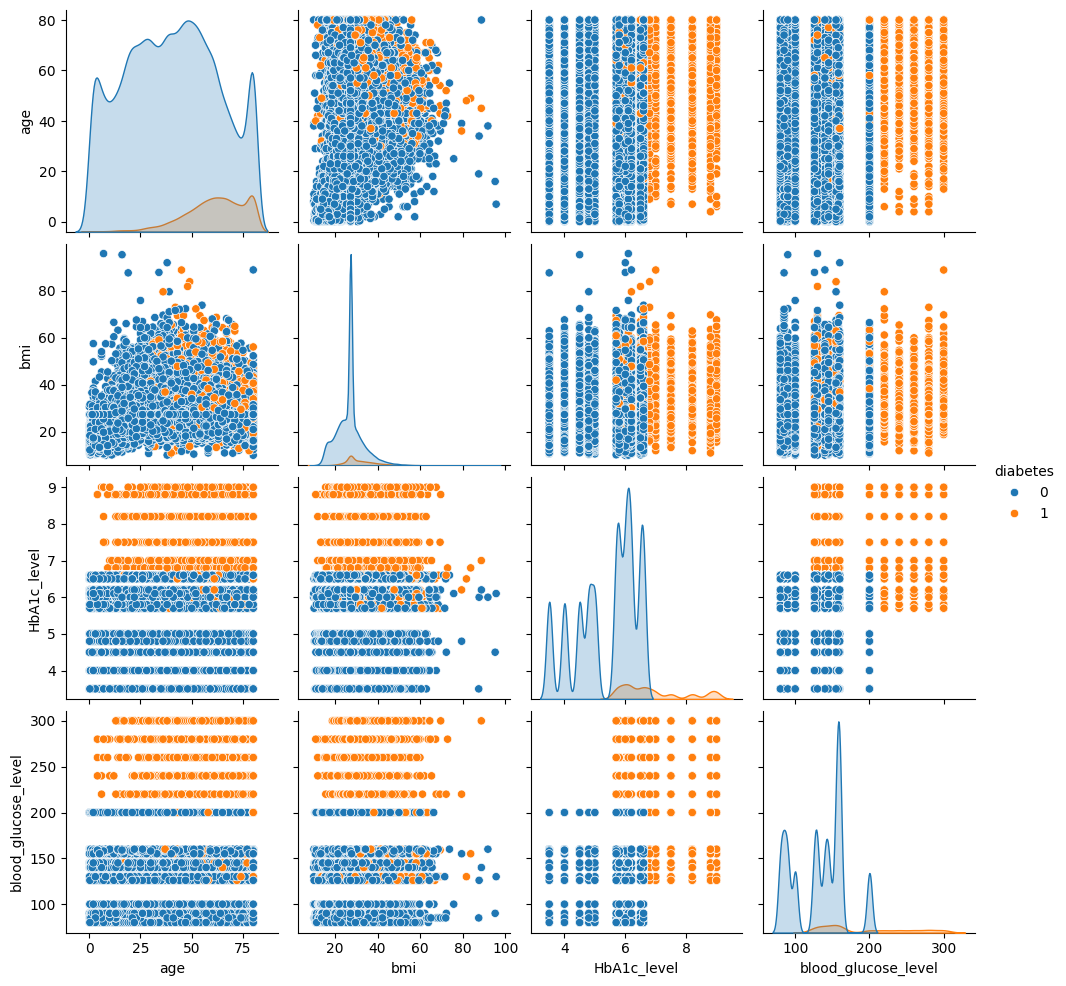

In [9]:
sns.pairplot(data = df[['age','bmi','HbA1c_level','blood_glucose_level','diabetes']], hue = 'diabetes')

## Key Insights from Pairplot Analysis

### 1. Feature Discrimination Power
- **HbA1c level** provides the **clearest separation** between diabetic and non-diabetic individuals.  
  - Most non-diabetic cases have HbA1c levels **below 6.0**.  
  - Diabetic cases are highly concentrated at **HbA1c ≥ 6.5**.

- **Blood glucose level** is the **second most informative feature**.  
  - Diabetic individuals tend to have significantly higher blood glucose levels.  
  - Some overlap exists in the mid-range (approximately **130–160**).

### 2. Demographic and Physical Factors
- **Age** shows a **moderate association** with diabetes.  
  - Diabetes is more prevalent among **middle-aged and elderly** individuals.  
  - Younger individuals rarely appear in the diabetic group.

- **BMI alone is not a strong discriminator**.  
  - There is substantial overlap in BMI values between diabetic and non-diabetic groups.  
  - BMI may contribute to diabetes risk **when combined with other features**.

### 3. Feature Relationships
- No strong **linear relationships** are observed between most feature pairs.  
- The data suggests **nonlinear and complex interactions** among variables.

### 4. Importance of Feature Interactions
- Feature combinations are more informative than individual features.  
- Diabetes risk increases when **high HbA1c or blood glucose levels** coincide with:
  - older age, and/or  
  - higher BMI.

Now, we are going to the data preprocessing section, which includes the following methods:
- Eliminate 'Other' value in column 'gender'
- Round values in column 'age', making it an integer-type column
- Encode values in column 'BMI', dividing them into 4 big groups: Underweight, Normal, Overweight and Obese
- Merge some current values in column 'smoking_history' into more general groups. The purpose of this transformation is to reduce categorical complexity, merge related smoking behaviors, and create more meaningful and interpretable categories for subsequent analysis or modeling.

In [10]:
df = df[df['gender'] != 'Other']
df['age'] = list(map(lambda x: round(x),df['age']))
df['bmi_description'] = list(map(lambda x: 'Underweight' if (x < 18.5) else
                               'Normal' if (x < 25) else
                               'Overweight' if (x < 30) else 'Obese',df['bmi']))
df['smoking_history'] = list(map(lambda x: 'current' if x == 'ever' else 'not current' if x == 'former' else x,df['smoking_history']))
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,bmi_description
0,Female,80,0,1,never,25.19,6.6,140,0,Overweight
1,Female,54,0,0,No Info,27.32,6.6,80,0,Overweight
2,Male,28,0,0,never,27.32,5.7,158,0,Overweight
3,Female,36,0,0,current,23.45,5.0,155,0,Normal
4,Male,76,1,1,current,20.14,4.8,155,0,Normal
...,...,...,...,...,...,...,...,...,...,...
99995,Female,80,0,0,No Info,27.32,6.2,90,0,Overweight
99996,Female,2,0,0,No Info,17.37,6.5,100,0,Underweight
99997,Male,66,0,0,not current,27.83,5.7,155,0,Overweight
99998,Female,24,0,0,never,35.42,4.0,100,0,Obese


<Axes: xlabel='bmi_description', ylabel='count'>

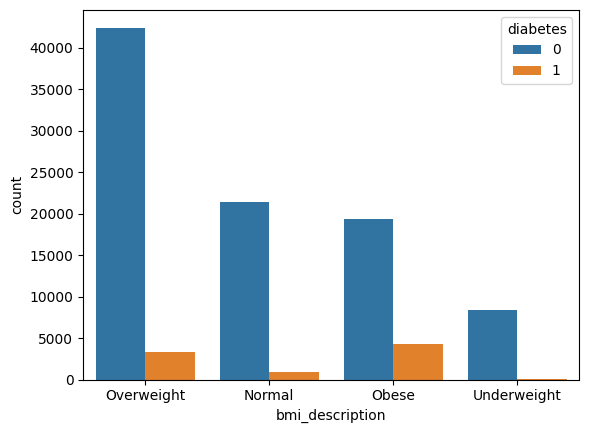

In [11]:
sns.countplot(data = df, x = 'bmi_description', hue = 'diabetes')

<Axes: xlabel='smoking_history', ylabel='count'>

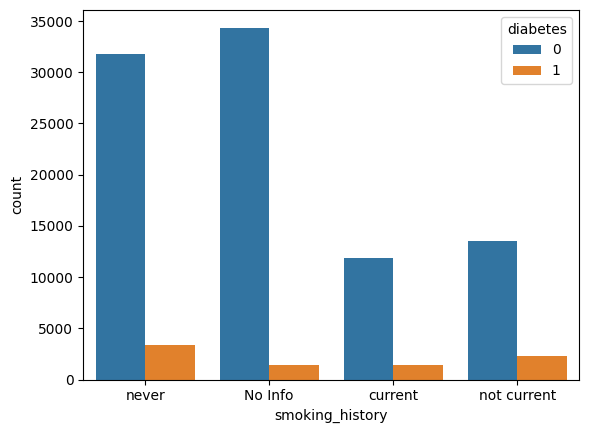

In [12]:
sns.countplot(data = df, x = 'smoking_history', hue = 'diabetes')

<Axes: xlabel='gender', ylabel='count'>

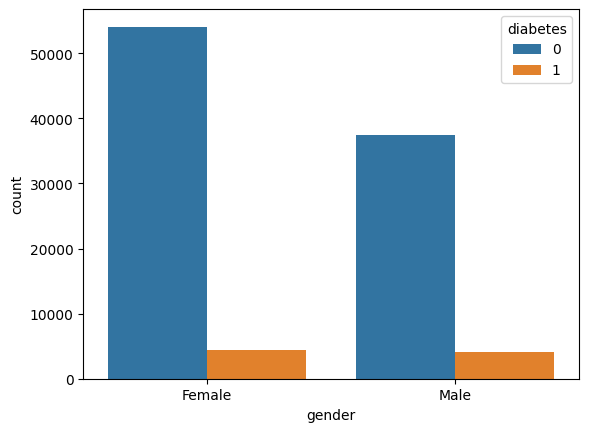

In [13]:
sns.countplot(data = df, x = 'gender', hue = 'diabetes')

From three counplots above, we can see most diabetics are suffering overweight and obese. Meanwhile, it seems that there are no significant differences in distribution of diabetics between values in smoking_history and gender

In [14]:
df[['age','hypertension','heart_disease','HbA1c_level','blood_glucose_level','diabetes']].groupby('diabetes').agg(['min','max','mean','std'])

age                           hypertension                          \
         min max       mean        std          min max      mean       std   
diabetes                                                                      
0          0  80  40.117192  22.306761            0   1  0.058995  0.235617   
1          3  80  60.946588  14.549880            0   1  0.245647  0.430496   

         heart_disease                         HbA1c_level                 \
                   min max      mean       std         min  max      mean   
diabetes                                                                    
0                    0   1  0.029241  0.168481         3.5  6.6  5.396759   
1                    0   1  0.149059  0.356167         5.7  9.0  6.934953   

                   blood_glucose_level                              
               std                 min  max        mean        std  
diabetes                                                            
0         0.971600                  80  200  132.851173  34.247503  
1         1.076562                 126  300  194.094706  58.641111

## Descriptive Statistics by Diabetes Status

The table summarizes key statistical measures (*minimum, maximum, mean, and standard deviation*) for selected features, grouped by diabetes status.

### 1. Age
- Individuals with diabetes have a **significantly higher mean age** (≈ 60.9) compared to non-diabetic individuals (≈ 40.1).
- The diabetic group shows a **lower standard deviation**, indicating a more concentrated age range.
- This suggests that **diabetes risk increases with age**.

### 2. Hypertension
- The prevalence of hypertension in the diabetic group (**≈ 24.6%**) is substantially higher than in the non-diabetic group (**≈ 5.9%**).
- This indicates a **strong association** between hypertension and diabetes.

### 3. Heart Disease
- The diabetic group has a much higher prevalence of heart disease (**≈ 14.9%**) compared to the non-diabetic group (**≈ 2.9%**).
- This reflects the **close relationship between cardiovascular conditions and diabetes**.

### 4. HbA1c Level
- The non-diabetic group has a mean HbA1c level of approximately **5.40**, which falls within the normal range.
- The diabetic group shows a significantly higher mean HbA1c level (**≈ 6.93**), consistent with clinical diagnostic thresholds.
- This clear difference indicates that **HbA1c level is the most discriminative feature**.

### 5. Blood Glucose Level
- The mean blood glucose level in the diabetic group (**≈ 194 mg/dL**) is substantially higher than in the non-diabetic group (**≈ 133 mg/dL**).
- The diabetic group also exhibits a larger standard deviation, indicating **greater variability in glucose levels**.
- This reflects impaired glucose regulation among diabetic individuals.

### Overall Summary
- Diabetic individuals tend to be:
  - older,
  - more likely to have hypertension and heart disease,
  - characterized by significantly higher HbA1c and blood glucose levels.
- **HbA1c level** and **blood glucose level** provide the strongest separation between diabetic and non-diabetic groups.


In the final stage, we are going to apply a classification model to predict whether a person is diabetic or not. For our dataset, Random Forest is chosen.

As we known, the dataset is facing imbalanced problem. Therefore, we have to make use of either an over-sampling or under-sampling technique. In our case, SMOTE is the choice. However, selecting a proper sampling strategy is a must because the default value (1.0) is not always the best one.

In addition, we need to assign the optimal value for some hyperparameters in Random Forest model to maximize its performance.

So, what is the method to pick the best value for the hyperparameters ?


**GridSearch** is our chosen approach

Before finding the optimal strategies, we split train and test dataset as the ratio is train/test = 7/3. Besides that, it is necessary to drop some columns which are not considerably informative.

In this case, we remove gender, smoking_history and bmi_description (we already had numeric bmi values).

Finally, we scale the data using Standard Scaler.

In [15]:
X = df.drop(columns = ['gender','smoking_history','bmi_description','diabetes'])
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def best_strategy():
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('smote', SMOTE(random_state=42)),
      ('model', RandomForestClassifier(random_state=42))
  ])
  param_grid = {'smote__sampling_strategy': [0.3, 0.5, 0.7, 1.0]}

  grid = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5, n_jobs=-1)
  grid.fit(X_train, y_train)
  return grid.best_params_

best_strategy = best_strategy()
best_strategy

{'smote__sampling_strategy': 0.3}

In [16]:
def grid_search():
  param_grid = {
          'bootstrap': [True, False],
          'criterion': ['gini','entropy'],
          'min_samples_split': [100,500,1000]
  }
  grid = GridSearchCV(estimator = RandomForestClassifier(random_state = 42), param_grid = param_grid, cv = 5, scoring = 'f1_macro')
  grid.fit(X_train, y_train)
  return grid.best_params_

best_params = grid_search()
best_params

{'bootstrap': False, 'criterion': 'gini', 'min_samples_split': 100}

After having got values we need for hyperparameters, it's time to utilize the model with these values and check the final result by creating a classification report and sketching the confusion matrix by heatmap.

In [17]:
models = RandomForestClassifier(**best_params, random_state = 42)
X_train, y_train = SMOTE(sampling_strategy=best_strategy['smote__sampling_strategy'], random_state = 42).fit_resample(X_train, y_train)

models.fit(X_train, y_train)
y_pred = models.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     27386
           1       0.86      0.73      0.79      2609

    accuracy                           0.97     29995
   macro avg       0.92      0.86      0.89     29995
weighted avg       0.96      0.97      0.97     29995



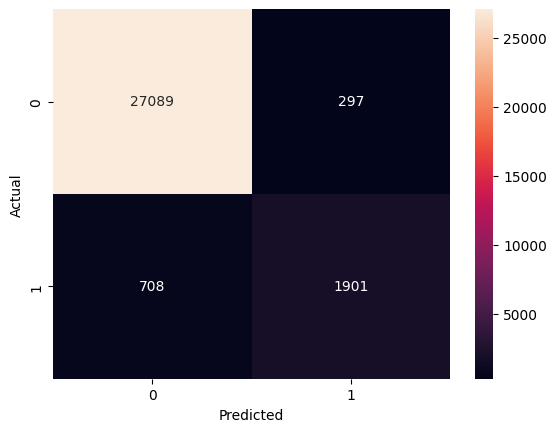

In [18]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Model Evaluation

### Overall Performance
The proposed model achieves an overall **accuracy of 97%**, indicating strong predictive capability. However, due to the **severe class imbalance** in the dataset, accuracy alone is insufficient to fully reflect the model’s effectiveness.

### Confusion Matrix Analysis
An analysis of the confusion matrix reveals the following:
- The model correctly classifies **27,089 non-diabetic cases** as negative.
- Only **297 non-diabetic cases** are incorrectly predicted as diabetic.
- **1,901 diabetic cases** are correctly identified.
- However, **708 diabetic cases** are misclassified as non-diabetic, resulting in a relatively high number of false negatives.

This observation is particularly concerning given the medical nature of the problem.

### Class-wise Performance
For the **non-diabetic class (Class 0)**, the model demonstrates excellent performance with a **precision of 0.97**, **recall of 0.99**, and an **F1-score of 0.98**.

In contrast, for the **diabetic class (Class 1)**, the model achieves a **precision of 0.86**, **recall of 0.73**, and an **F1-score of 0.79**. While precision remains relatively high, the moderate recall indicates that a significant portion of diabetic patients is not detected by the model.

### Conclusion
In summary, while the proposed Random Forest model achieves high overall accuracy and strong performance on the majority class, its moderate recall for the diabetic class highlights the limitations caused by class imbalance, indicating that further improvements—such as refined sampling strategies and more effective hyperparameter tuning—are necessary to reduce false negatives and enhance clinical applicability.



Finally, we figure out which factors contributing to our model's prediction the most. Unsurprisingly, HbA1c_level and blood_glucose_level play the key role in the model. Age and BMI rank next, while hypertension and heart_disease are less significant indicators.

<Axes: xlabel='Importance', ylabel='Feature'>

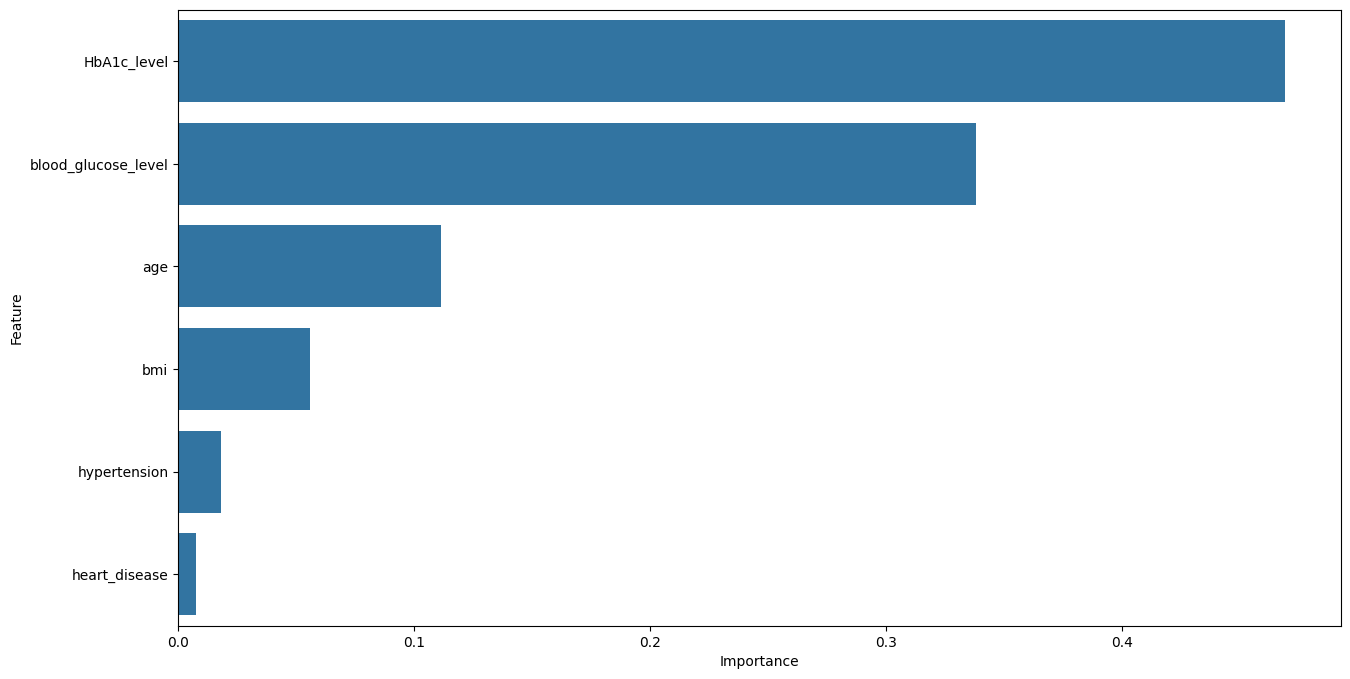

In [19]:
importances = models.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize = (15,8))
sns.barplot(x = 'Importance', y = 'Feature', data = feature_importance_df)